<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [28]:
from bs4 import BeautifulSoup
import re,os
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
from wordcloud import WordCloud
import urllib.request as urllib2

# from sklearn.feature_extraction.text import TfidfVectorizer
def read_file():
    return open("text-dataset.txt","r").readlines()
def write_file(data):
    file = open("text-dataset.txt","w")

    for line in data[0]:
        file.write(line)
    file.close()
def getDoxyDonkeyText(testUrl):
    request = urllib2.Request(testUrl)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    mydivs = soup.findAll("div", {"class":'post-body'})
    

    posts =[]
    for div in mydivs:
        posts+=map(lambda p:str(str(p.text).encode('ascii', errors='replace')).replace("?"," "), div.findAll("li"))
    return posts

def extractPosts():
    url = "https://doxydonkey.blogspot.com/"
    # requesting url
    links = []
    request = urllib2.Request(url)
    respOfReq = urllib2.urlopen(request)
    # getting data

    soup = BeautifulSoup(respOfReq,features="lxml")

    for aTag in soup.findAll('a'):
   
        try:
            url = aTag['href']
            title = aTag['title']
            if title == "Older Posts":
                # Printing title & URL
                print(title, url)
                links.append(url)

        except:

            title = ""
    return links


if os.path.isfile("text-dataset.txt"):
    print("reading from file")
    data = read_file()
else:
    # CALLING extract POSTS
    print("extracting data...")
    links = extractPosts()


    doxyDonkeyPosts = []
    for link in links:
        doxyDonkeyPosts.append(getDoxyDonkeyText(link))

    write_file(data=doxyDonkeyPosts)
    data = read_file()


reading from file


17


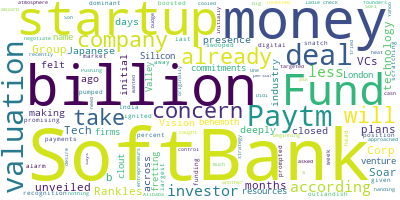

In [32]:
print(len(data))



# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud

wordcloud.generate(data[0])
# Visualize the word cloud
wordcloud.to_image()

In [52]:
!pip install stop_words
!pip install gensim
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
en_stop = get_stop_words('en')
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()
texts = []
for i in data:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
ldamodel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
print(ldamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.014*"s" + 0.010*"uber" + 0.009*"compani" + 0.007*"will" + 0.007*"develop" + 0.007*"bitcoin" + 0.006*"drive" + 0.006*"self" + 0.006*"car" + 0.006*"use"'), (1, '0.025*"s" + 0.013*"billion" + 0.011*"compani" + 0.008*"softbank" + 0.007*"percent" + 0.007*"fund" + 0.006*"deal" + 0.005*"video" + 0.005*"yuan" + 0.005*"revenu"')]


In [33]:
# Bertopic
!pip install bertopic
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(data)

# Extracting topics

freq = topic_model.get_topic_info(); freq.head(5)

# Top 10 Topics
topic_model.topics_[:10]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-12-11 22:19:07,878 - BERTopic - Transformed documents to Embeddings
2022-12-11 22:19:10,975 - BERTopic - Reduced dimensionality
2022-12-11 22:19:10,992 - BERTopic - Clustered reduced embeddings


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [34]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,17,-1_the_to_of_and


In [37]:
topic_model.get_topic(-1)

[('the', 0.16373167280347628),
 ('to', 0.11379042620286178),
 ('of', 0.09368024395482888),
 ('and', 0.08607478762231471),
 ('in', 0.07815135982118308),
 ('that', 0.05965248032525775),
 ('it', 0.048721878466175275),
 ('for', 0.04543851949244741),
 ('on', 0.038613100691242366),
 ('as', 0.038613100691242366)]

In [38]:
topic_model.topics_[:10]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

I have used Bertopic algorithm for this task and got most frequently used words in the dataset provided. The probabilities of most used 10 words are shown in above cell. 
     Word Cloud results show that the most used words are related to finance. 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [44]:
# Write your code here
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
model_path = 'distilbert-base-uncased-finetuned-sst-2-english'
nli_model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path, num_labels=2)


df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)



In [75]:
df_train

['b"Square Will Replace Meters in Washington Taxis: Washington, D.C., is enlisting Square Inc. s help as its taxi commission tries to help the city s cabbies compete with Uber drivers. By the end of August, all of the taxis in Washington have to tear out their traditional meters and start using smartphones or tablets, in what the city government has been describing as a complete reimagining of how the cab system works. For Square, the deal reflects an increasing focus on becoming the payment platform for a range of other company\'s mobile applications, websites and point-of-sale devices. No money is changing hands between the company and the city. Square agreed to satisfy the department s requirement that drivers give up no more than 2.65 percent of their fares in transaction fees, according to the department. That s lower than the standard 2.75 commission it usually takes and significantly less than the 3.5 percent to 5 percent commission that drivers currently pay to use the mechanic

In [46]:
def tokenize_df(tokenizer, data, has_label=True):

 
        #returns dictionary with keys: input_ids, attention_mask)
        encoding_dict = tokenizer(data, padding="max_length", max_length=64,
                                  truncation=True, return_token_type_ids=False)
        #add 'label' key if we are making train or validation data
        # if has_label: 
        #     encoding_dict['label'] = df['Label'].tolist()
        #convert dictionary of lists into list of dictionaries
        return [dict(zip(encoding_dict, t)) for t in zip(*encoding_dict.values())]

#apply above function to create lists to use for our data:
X_train_tokenized = tokenize_df(tokenizer, df_train)
X_val_tokenized = tokenize_df(tokenizer, df_val)
X_test_tokenized = tokenize_df(tokenizer, df_test, has_label=False)
train_dataset = X_train_tokenized
eval_dataset = X_val_tokenized
test_dataset = X_test_tokenized

In [72]:
print(eval_dataset)

[{'input_ids': [101, 1038, 1000, 3730, 9299, 1005, 1055, 1002, 2531, 4551, 6627, 4636, 4635, 4244, 18315, 2015, 2004, 26004, 2015, 2061, 2906, 1024, 1999, 1996, 2706, 2144, 3730, 9299, 2177, 13058, 1012, 11521, 3488, 2005, 1037, 1002, 2531, 4551, 2974, 4636, 1010, 1996, 2887, 2194, 2038, 2042, 2437, 2049, 3739, 6171, 2371, 2408, 1996, 3068, 1012, 1996, 4432, 4636, 2701, 1037, 2261, 2420, 3283, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}, {'input_ids': [101, 1038, 1000, 4283, 999, 2030, 4283, 1012, 8224, 2097, 22701, 4081, 10373, 14054, 2000, 2115, 18394, 1012, 2065, 2017, 2224, 8224, 1005, 1055, 20917, 4014, 10439, 1010, 2017, 2089, 2031, 2464, 2242, 2047, 3769, 2039, 2006, 2115, 3898, 2023, 2733, 1024, 4081, 10960, 2005, 2115, 22028, 1012, 1996, 2693, 24899, 2028, 2126, 2008, 8224, 2003, 2478, 2049, 3445, 3579, 20

In [47]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
nli_model.to(device)
print(f'Using {device}')

Using cpu


In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall}

training_args = TrainingArguments(
                output_dir="/content",
                label_names = [],
                learning_rate=1e-4,
                num_train_epochs=2, 
                report_to="none",
                evaluation_strategy="steps", 
                eval_steps=10,
                save_steps=10,
                logging_steps=10,
                load_best_model_at_end=True
                )
trainer = Trainer(
    model=nli_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics)
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=4)])
trainer.train()

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [55]:

import pandas as pd
sf = pd.read_csv('train.csv')
sf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
import unittest
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [67]:

x = sf[['OverallQual', 'GrLivArea', 'GarageCars']]
y = sf['SalePrice']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [61]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(x, y, lr)       
        
    return self
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))

In [68]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)


Let's Now Predict on the basis of above saved data. If i put the sale price of 2000 for a house then it will predict the values for four variables as shown in X variable above 'OverallQual', 'GrLivArea', 'GarageCars' & 'Sale Price'.


In [71]:
clf.predict(2000)

array([3.61842391e+08, 7.49572085e+07, 5.32638766e+07, 3.18424516e+07])